In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [4]:
df = pd.read_csv("dfhappy.csv")

In [5]:
df

,,Overall rank,country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,tavg
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.352894
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,10.321334
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,8.104241
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5.449112
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,11.179195
...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,17.850000
152,152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,22.350000
153,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,12.600000
154,154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,28.327278


In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,tavg
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,19.399574
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,7.334859
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,12.860886
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,20.925301
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,25.794983
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,31.381719


<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

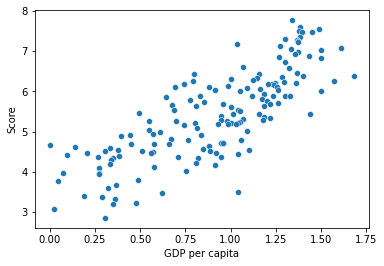

In [7]:
sns.scatterplot(x="GDP per capita", y="Score", data=df)

<AxesSubplot:xlabel='tavg', ylabel='Score'>

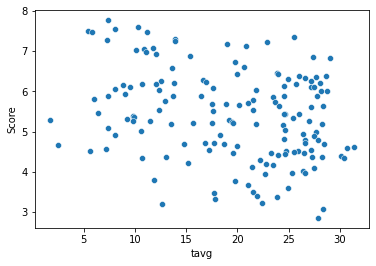

In [8]:
sns.scatterplot(x="tavg", y="Score", data=df)

<AxesSubplot:xlabel='Social support', ylabel='tavg'>

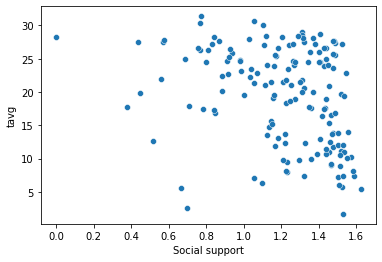

In [11]:
sns.scatterplot(x="Social support", y="tavg", data=df)

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='tavg'>

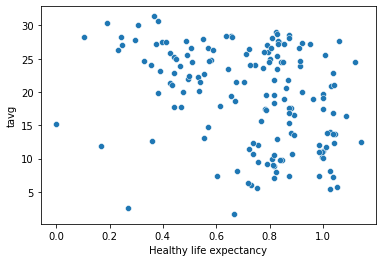

In [12]:
sns.scatterplot(x="Healthy life expectancy", y="tavg", data=df)